In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
df = pd.read_csv('../dados_processados/cursos-pos-processamento.csv',sep=';')

In [3]:
df_scaled = df.drop(['no_curso','co_curso'],axis=1)

In [4]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [5]:
pca.explained_variance_ratio_

array([3.52400586e-01, 8.42397874e-02, 5.59032406e-02, 4.67075741e-02,
       4.38920028e-02, 3.08182137e-02, 2.60064934e-02, 2.46128516e-02,
       2.10335398e-02, 1.89547007e-02, 1.75708904e-02, 1.58158269e-02,
       1.38249700e-02, 1.33260938e-02, 1.30890001e-02, 1.25759721e-02,
       1.24980240e-02, 1.12884030e-02, 1.06338479e-02, 1.02820167e-02,
       9.61759590e-03, 9.09825161e-03, 8.34448641e-03, 8.16601925e-03,
       7.91089575e-03, 7.30565652e-03, 7.13615639e-03, 6.37557500e-03,
       6.09909685e-03, 5.98158369e-03, 5.37679572e-03, 5.05158494e-03,
       4.80585555e-03, 4.60395977e-03, 4.09925044e-03, 3.95946810e-03,
       3.70244979e-03, 3.51759972e-03, 3.38109431e-03, 3.15348731e-03,
       2.95419114e-03, 2.84151902e-03, 2.52242767e-03, 2.45749567e-03,
       2.27755311e-03, 2.11614997e-03, 2.07472322e-03, 1.92277247e-03,
       1.75255150e-03, 1.72727530e-03, 1.68075156e-03, 1.53463694e-03,
       1.47036305e-03, 1.31658306e-03, 1.21340514e-03, 1.15335585e-03,
      

Text(0, 0.5, 'Variância cumulativa explicada')

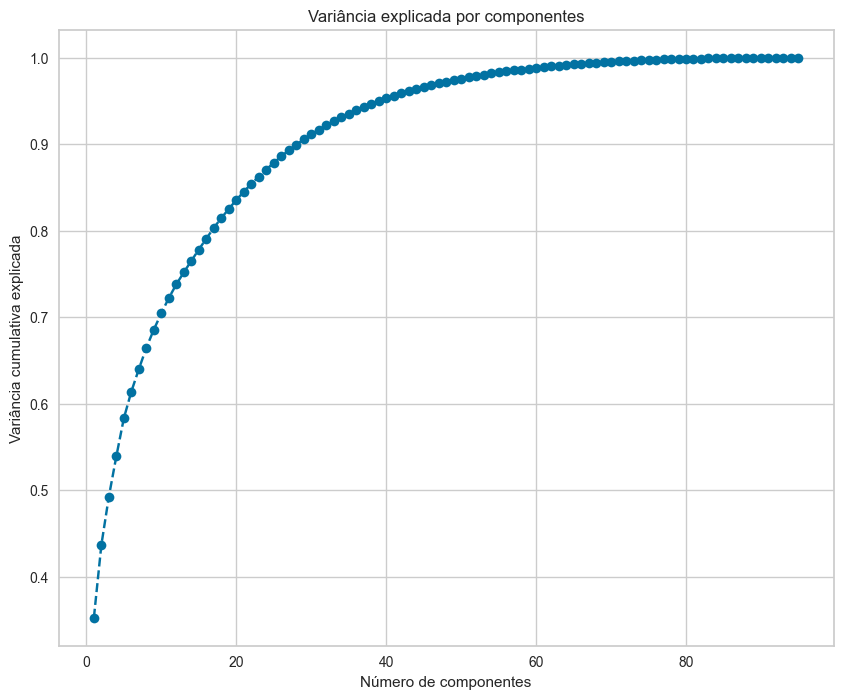

In [6]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 96), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Variância explicada por componentes")
plt.xlabel("Número de componentes")
plt.ylabel("Variância cumulativa explicada")

In [7]:
pca = PCA(n_components=20)

In [8]:
pca.fit(df_scaled)

PCA(n_components=20)

In [9]:
pca.transform(df_scaled)

array([[17.87482049,  2.23899219, -0.09375661, ..., -2.72866685,
         0.61848235,  0.30106268],
       [14.62055611, -2.1776532 ,  1.32837588, ..., -2.48635373,
         0.10231764,  0.65714145],
       [11.93878031, -4.92807229,  1.3124044 , ..., -2.26062969,
        -0.90814867, -0.3995483 ],
       ...,
       [-0.60660216,  2.84636598, -0.18415026, ...,  0.27791446,
        -0.59469621,  0.5447031 ],
       [-3.58258911, -0.86587102,  0.5909534 , ...,  0.88684304,
        -1.28350892,  1.25921839],
       [-4.07522519,  1.07794907, -0.68124753, ...,  1.10460211,
        -1.20389703,  1.24549868]])

In [10]:
scores_pca = pca.transform(df_scaled)

In [11]:
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-means with PCA clustering')

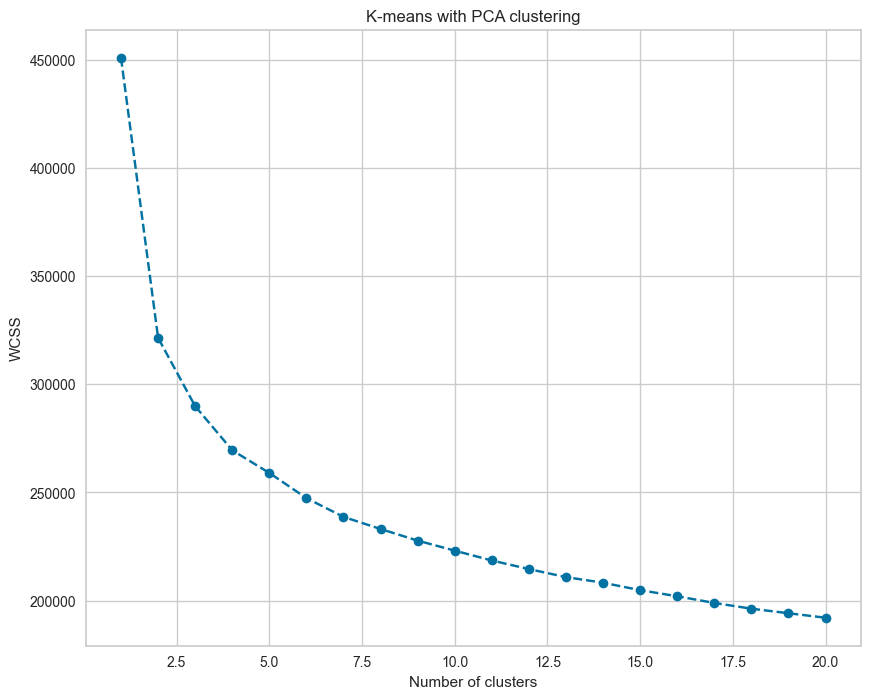

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("K-means with PCA clustering")

In [13]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [14]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

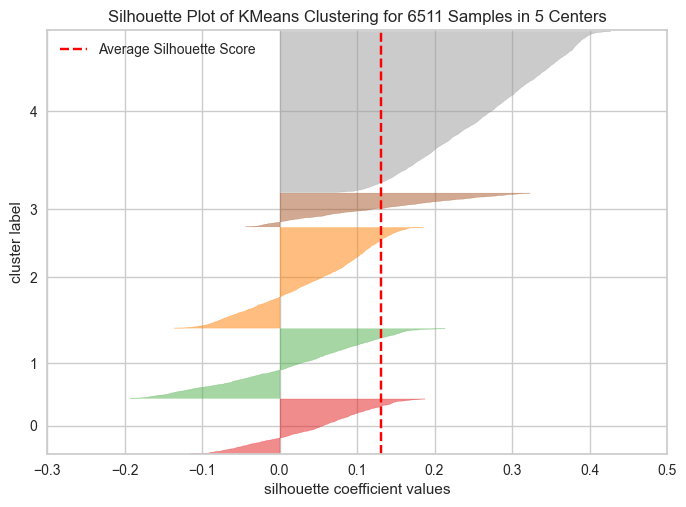

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 6511 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
visualizer = SilhouetteVisualizer(kmeans_pca)
visualizer.fit(scores_pca)
visualizer.show()

In [16]:
df_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-20: ] = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8',
                                       'Componente 9', 'Componente 10', 'Componente 11', 'Componente 12',
                                       'Componente 13', 'Componente 14', 'Componente 15', 'Componente 16', 'Componente 17', 'Componente 18', 'Componente 19', 'Componente 20']
df_pca_kmeans['KMeans PCA'] = kmeans_pca.labels_

In [17]:
df_pca_kmeans.head()

,"no_cine_area_geral_agricultura,_silvicultura,_pesca_e_veterinaria",no_cine_area_geral_artes_e_humanidades,"no_cine_area_geral_ciencias_naturais,_matematica_e_estatistica","no_cine_area_geral_ciencias_sociais,_comunicacao_e_informacao",no_cine_area_geral_computacao_e_tecnologias_da_informacao_e_comunicacao_(tic),no_cine_area_geral_educacao,"no_cine_area_geral_engenharia,_producao_e_construcao","no_cine_area_geral_negocios,_administracao_e_direito",no_cine_area_geral_saude_e_bem-estar,no_cine_area_geral_servicos,...,Componente 12,Componente 13,Componente 14,Componente 15,Componente 16,Componente 17,Componente 18,Componente 19,Componente 20,KMeans PCA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.155667,-1.969796,-0.443798,-1.312519,-0.267699,0.398843,-2.728667,0.618482,0.301063,3
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.029232,-2.557890,1.012601,1.569735,1.127726,0.875478,-2.486354,0.102318,0.657141,3
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-2.419198,-3.044885,-0.134589,-0.556203,-0.021880,0.801921,-2.260630,-0.908149,-0.399548,3
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.968328,-0.672355,-1.208435,-0.654178,-0.230029,1.496176,-2.113173,-1.545644,0.063667,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.027102,0.292536,-0.134447,-0.113385,-0.582264,0.224289,-0.954640,-0.595977,-1.974023,2


In [18]:
df_pca_kmeans['Cluster'] = df_pca_kmeans['KMeans PCA'].map({0:'Primeiro', 1: 'Segundo', 2: 'Terceiro', 3: 'Quarto', 4: 'Quinto'})

In [19]:
df_pca_kmeans.head()

,"no_cine_area_geral_agricultura,_silvicultura,_pesca_e_veterinaria",no_cine_area_geral_artes_e_humanidades,"no_cine_area_geral_ciencias_naturais,_matematica_e_estatistica","no_cine_area_geral_ciencias_sociais,_comunicacao_e_informacao",no_cine_area_geral_computacao_e_tecnologias_da_informacao_e_comunicacao_(tic),no_cine_area_geral_educacao,"no_cine_area_geral_engenharia,_producao_e_construcao","no_cine_area_geral_negocios,_administracao_e_direito",no_cine_area_geral_saude_e_bem-estar,no_cine_area_geral_servicos,...,Componente 13,Componente 14,Componente 15,Componente 16,Componente 17,Componente 18,Componente 19,Componente 20,KMeans PCA,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.969796,-0.443798,-1.312519,-0.267699,0.398843,-2.728667,0.618482,0.301063,3,Quarto
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.557890,1.012601,1.569735,1.127726,0.875478,-2.486354,0.102318,0.657141,3,Quarto
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-3.044885,-0.134589,-0.556203,-0.021880,0.801921,-2.260630,-0.908149,-0.399548,3,Quarto
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.672355,-1.208435,-0.654178,-0.230029,1.496176,-2.113173,-1.545644,0.063667,0,Primeiro
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.292536,-0.134447,-0.113385,-0.582264,0.224289,-0.954640,-0.595977,-1.974023,2,Terceiro


In [20]:
# Pegar os dois primeiros componentes (e mais importantes) e visualizar os clusters

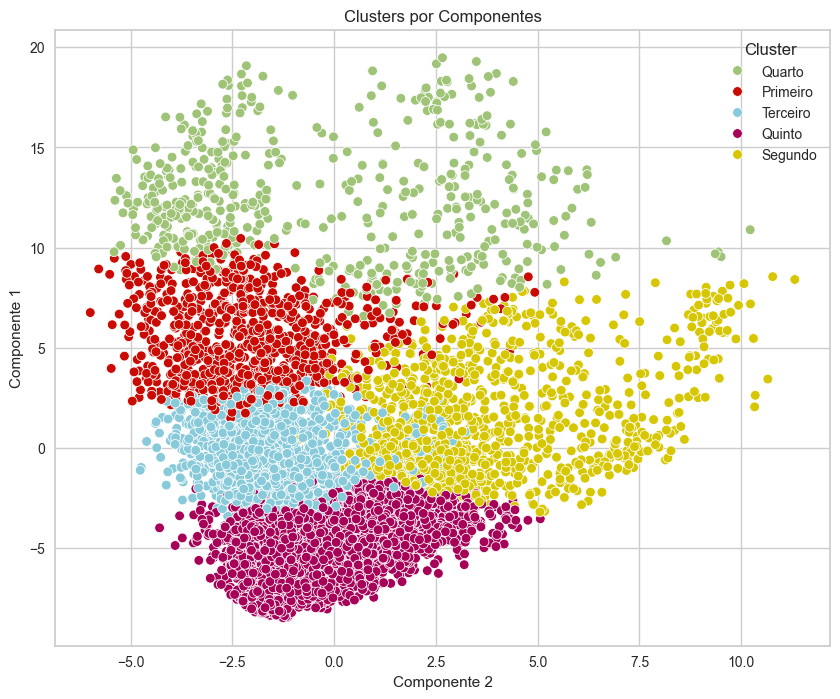

In [21]:
y_axis = df_pca_kmeans['Componente 1']
x_axis = df_pca_kmeans['Componente 2']
plt.figure(figsize= (10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_pca_kmeans['Cluster'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters por Componentes')
plt.show()